In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import re



In [2]:
#import cvs fil som er hentet fra OsloMet Canvas siden
url = 'https://raw.githubusercontent.com/atikagondal/Lab-2023-DAVE3625/main/Lab%202/data/Titanic.csv'
df = pd.read_csv(url, sep=',')

df.head(1)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [3]:
#Check for null and nan values
df.isna().sum()


PassengerId       0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [4]:
#Fill Age, Fare and Embarked with sensible values.
##Fill missing values - for this lab, lets just use teh median() function
df["Age"] = df["Age"].fillna(df["Age"].median())
df["Fare"] = df["Fare"].fillna(df["Fare"].median())



In [5]:
#Add a new column for HasCabin
# ~ invert the bool value, so that no cabin = False
df['HasCabin'] = ~df.Cabin.isnull()
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,HasCabin
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,False
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,True
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,True
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,False


In [6]:
#Lets extract the title for each person on the boat, and make a new column called «Title»
# As we can see from the data set, the syntax for names is LastName, Title. RestOfName

#Extract a certain string using regex
lambda x: re.search(' ([A-Z][a-z]+)\.', x).group(1)


#And in our case we would like to put this data in a new column, so we can run
df["Title"] = df.Name.apply(lambda x: re.search(' ([A-Z][a-z]+)\.', x).group(1)) 

df.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,HasCabin,Title
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,False,Mr
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,True,Mrs
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False,Miss
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,True,Mrs
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,False,Mr


In [7]:
#We can now see how many has each title. This can be done in many ways, but calling:
df["Title"].value_counts() 
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,HasCabin,Title
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,False,Mr
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,True,Mrs
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False,Miss
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,True,Mrs
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,False,Mr


In [8]:
#Replace Mlle and Ms with "Miss", and Mme with "Mr" using: 
df["Title"] = df["Title"].replace({'Mlle':'Miss', 'Ms':'Mr'})

#skriver ut de ulike titlene
df['Title'].value_counts()



Title
Mr          759
Miss        262
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Major         2
Don           1
Mme           1
Lady          1
Sir           1
Capt          1
Countess      1
Jonkheer      1
Dona          1
Name: count, dtype: int64

In [9]:
#grouping rest of the titles into "Unique"
df['Title'] = df['Title'].replace(['Don', 'Dona', 'Rev','Mme', 'Dr','Major', 'Lady', 'Sir', 'Col', 'Capt', 'Countess', 'Jonkheer'],'Unique')
#skriver ut de ulike titlene
df['Title'].value_counts()



Title
Mr        759
Miss      262
Mrs       197
Master     61
Unique     30
Name: count, dtype: int64

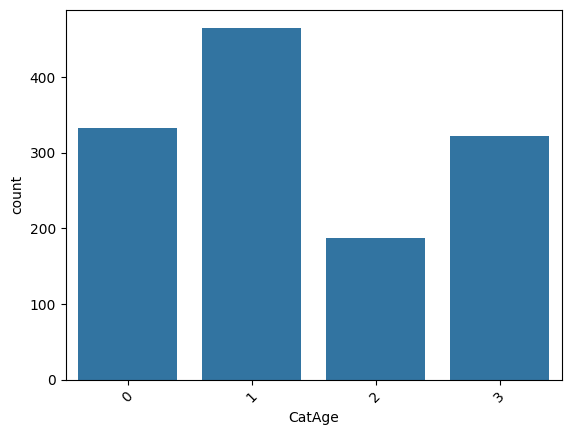

In [10]:


#Convert Age and Fare into categorical data.
#Age
df['CatAge'] = pd.qcut(df['Age'], q=4, labels=False )

#Plot
sns.countplot(x='CatAge', data=df);
plt.xticks(rotation=45);






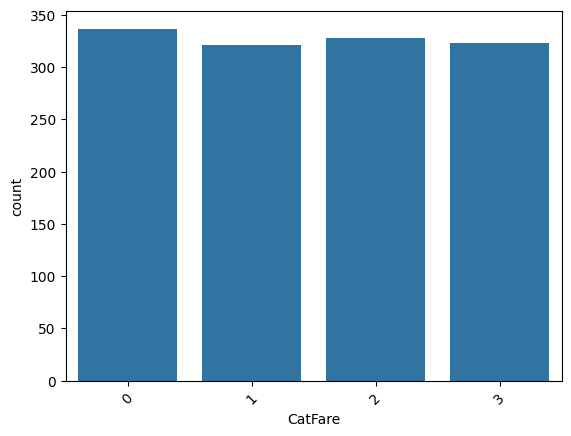

In [11]:
#Fare
df['CatFare'] = pd.qcut(df["Fare"], q=4, labels=False )

#Plot
sns.countplot(x='CatFare', data=df);
plt.xticks(rotation=45);



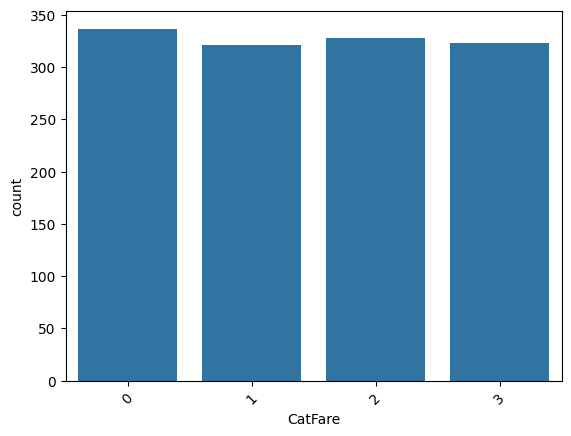

In [12]:
#Produce a plot
sns.countplot(x='CatFare', data=df);
plt.xticks(rotation=45);

In [13]:
#drop unnecessary columns
df = df.drop(["Age", "Fare", "Cabin", "Name", "Ticket"], axis=1)
df.head()





,PassengerId,Pclass,Sex,SibSp,Parch,Embarked,HasCabin,Title,CatAge,CatFare
0,1,3,male,1,0,S,False,Mr,0,0
1,2,1,female,1,0,C,True,Mrs,3,3
2,3,3,female,0,0,S,False,Miss,1,1
3,4,1,female,1,0,S,True,Mrs,2,3
4,5,3,male,0,0,S,False,Mr,2,1


In [14]:
#Convert categorial data to binary
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
#print(df['Sex'].isnull().sum())

df.head()


,PassengerId,Pclass,Sex,SibSp,Parch,Embarked,HasCabin,Title,CatAge,CatFare
0,1,3,0,1,0,S,False,Mr,0,0
1,2,1,1,1,0,C,True,Mrs,3,3
2,3,3,1,0,0,S,False,Miss,1,1
3,4,1,1,1,0,S,True,Mrs,2,3
4,5,3,0,0,0,S,False,Mr,2,1
